# 線形モデル

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib notebook
%matplotlib inline

# 2.3.3.1 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


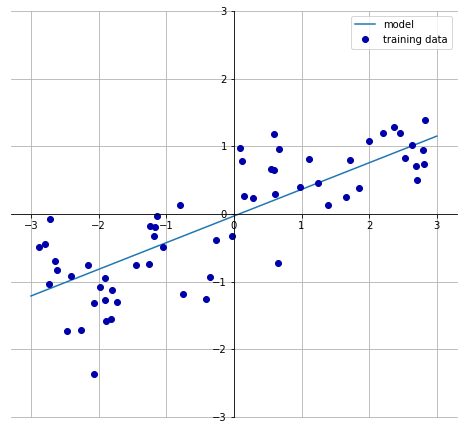

In [3]:
# 1次元のwaveデータセットで、w[-]とbを求める
# wとbは学習されたモデルのパラメータ
mglearn.plots.plot_linear_regression_wave()

# 2.3.3.2 線形回帰（通常最小二乗法）
線形モデルを用いた会期には様々なアルゴリズムがある。  
通常最小二乗法は、線形モデルによる回帰の1つ。  
訓練データにおいて、予測と真の回帰ターゲットyとの平均二乗誤差が最小になるように、パラメータwとbを求める。  
平均二乗誤差 : 予測と真の値との差を二乗したものの平均値  
w : 傾き、重み、係数  
b : オフセット、切片

In [10]:
# sklearnを用いて↑の図のモデルを作成（waveデータセット）

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# scikit-learnでは、訓練データから得られた属性には全て最後にアンダースコアをつける
print("lr.coef_: {}".format(lr.coef_)) #　係数
print("lr.intercept_: {}".format(lr.intercept_)) # 切片

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [14]:
# R^2が0.66はあまりよくない
# 訓練データとテストデータの値が非常に近い、適合不足であって過剰適合ではない、とみれる
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [15]:
# boston_housingデータセットに対するLinearRegression

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [16]:
# 訓練データに対しては非常に正確だが、テストデータに対しては悪い
# 訓練データとテストデータで性能が大きく異なるのは過剰適合が起きている兆候
# →複雑度を制御できるモデルを探す必要がある
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# 2.3.3.3 リッジ回帰
リッジ回帰は線形モデルによる回帰の1つ。  
予測に用いられる式は通常最小二乗法のものと同じ、加えて各係数に対してL2正則化を行う。  
正則化 : 過剰適合を防ぐために明示的にモデルを制約すること  
L2正則化 : 

In [17]:
from sklearn.linear_model import Ridge

# alphaパラメータを指定しない場合、デフォルトはalpha=1.0
ridge = Ridge().fit(X_train, y_train)

In [19]:
# LinearRegressionの場合に比べて、訓練セットのスコアは低く、テストセットのスコアは高い
# →過剰適合していないといえる
# Ridgeは制約の強いモデルなので、過剰適合の危険は少ない
# 複雑度の低いモデルは、訓練セットに対する性能は低いが汎化性能は高い
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [20]:
# alphaパラメータはモデルの簡潔さと、訓練セットに対する性能を調整するもの
# alphaを増やすと、係数はより0に近くなり、訓練セットに対する性能は低下する
# →汎化的にはそちらのほうがよい

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [21]:
# alphaが小さいとLinearRegressionと同じような挙動になる
# alpha=0がLinearRegression

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


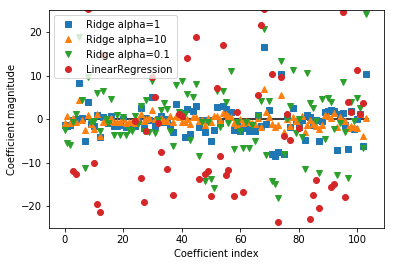

In [24]:
# alphaパラメータのモデルへの影響を、coef_属性を描画して確認する
# x軸はcoef_要素(x=0は最初の特徴量に対する係数)、y軸は特徴量に対応する係数の数値

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

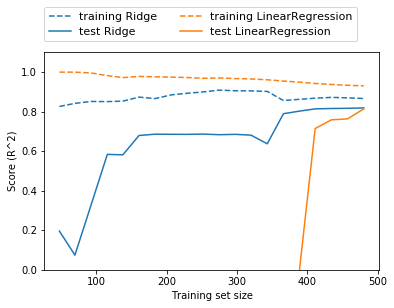

In [25]:
# alphaの値を固定して、利用できる訓練データの量を変化させ、正則化の影響を確認する
# データ数が少ない場合はリッジ回帰の性能がよい
# 十分なデータが有る場合は線形回帰が追いつく
# データが増えるほど訓練セットの性能が低くなるのは、モデルが過剰適合することが難しくなるため

mglearn.plots.plot_ridge_n_samples()

# 2.3.3.4 Lasso
Ridgeに代わる線形回帰  
Lasso模型数が0になるように制約をかける、L1正則化と呼ばれる方法で  
L1正則化を行うと、幾つかの係数が完全に0になり、自動的に特徴量を選択していることになる  

In [26]:
# Lassoをboston_housingデータセットに適用
# 性能は悪い、適合不足である
# 105の特徴量のうち4つしか使っていない

from sklearn.linear_model import Lasso

lasso =Lasso().fit(X_train, y_train) # デフォルトalpha=1.0
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [27]:
# 適合不足の度合いを減らすため、alphaを減らす
# この際、max_iterをデフォルト値から増やしてやる
# alphaを減らすとより複雑なモデルに適合することになる

lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [28]:
# alphaを小さくしすぎると、リッジの場合と同様に生息家の効果が薄れ、過剰適合が発生
# LinearRegressionと似たようなものになる

lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


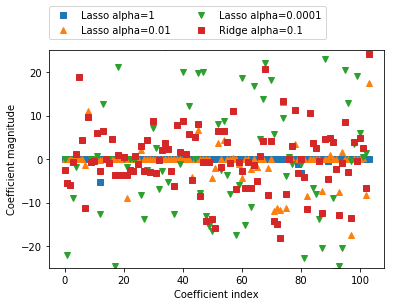

In [30]:
# alpha=1の場合にはほぼ係数は0であり、0でない場合の絶対値もかなり小さい
# alpha=0.01の場合も、殆どの係数は０である
# alpha=0.0001の場合、多くの係数は0でなくなり、絶対値も大きくなる
# Ridgeのalpha=0.1の場合は、alpha=0.01のLassoと同じような予測性能を示したが
# 係数は全てゼロでなかったことがわかる

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# 2.3.3.5 クラス分類のための線形モデル
線形モデルはクラス分類にも使われる

代表的なアルゴリズムは  
1.ロジスティック回帰  
2.線形サポートベクタマシン

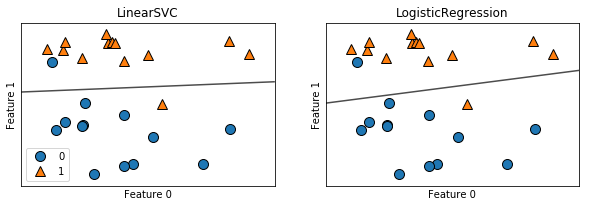

In [7]:
# ロジスティック回帰と線形サポートベクタマシンによる決定境界の可視化
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

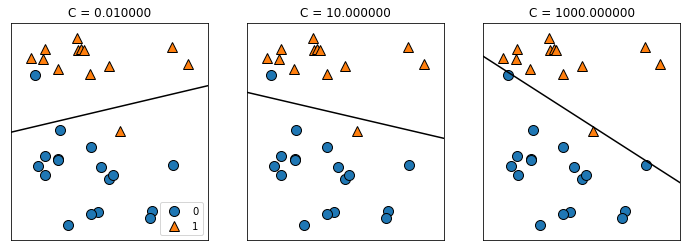

In [8]:
# Cが小さいほど強力な正則化が行われる、Cが大きほど訓練データに対しての適合度を上げる
mglearn.plots.plot_linear_svc_regularization()

In [11]:
# cancerデータセットに対してロジスティック回帰を適用
# 訓練セットとテストセットの精度がとても近いというのは適合不足の可能性が高い

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [12]:
# C=100 にすることで性能向上、複雑なモデルのほうが性能が高い

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [13]:
# デフォルトより強力に生息化した場合は、性能が下がった

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


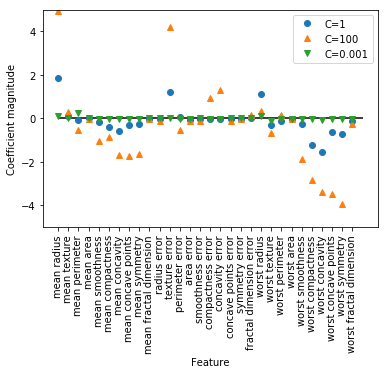

In [14]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Trainig accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Trainig accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Trainig accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


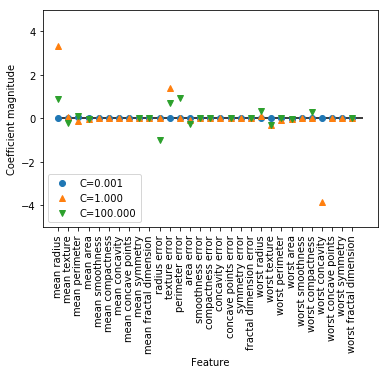

In [16]:
# L1正則化した場合（ロジスティック回帰はデフォルトL2正則化）
# わずかな特徴量しか使わないようになる
# penaltyパラメータにl1を

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Trainig accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

# 2.3.3.6 線形モデルによる多クラス分類
